In [1]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
print(df.head())      
print(df.info())      
print(df.describe())   


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [2]:
df.rename(columns={'Annual Income (k$)': 'Income',
                   'Spending Score (1-100)': 'Score'}, inplace=True)

X = df[['Income', 'Score']]

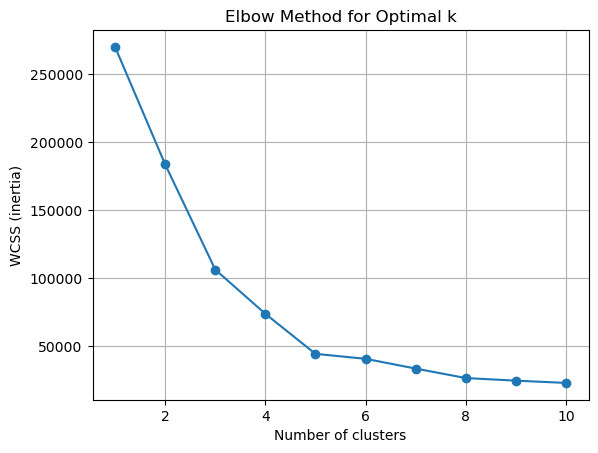

In [3]:
#Find k Using the Elbow Method
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (inertia)")
plt.grid(True)
plt.show()


In [4]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [5]:
df['Cluster'] = y_kmeans
print(df.head())


   CustomerID  Gender  Age  Income  Score  Cluster
0           1    Male   19      15     39        4
1           2    Male   21      15     81        2
2           3  Female   20      16      6        4
3           4  Female   23      16     77        2
4           5  Female   31      17     40        4


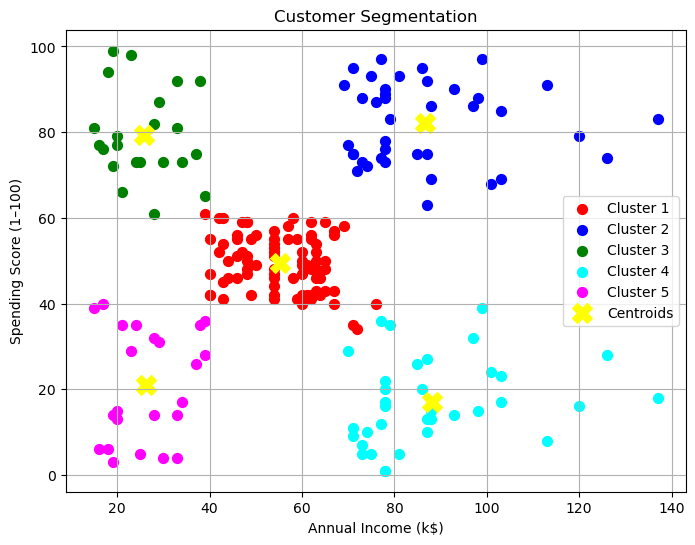

In [6]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X.values[y_kmeans == i, 0],
                X.values[y_kmeans == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='X', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
df.to_csv("customers_clustered.csv", index=False)